# **Carátula**

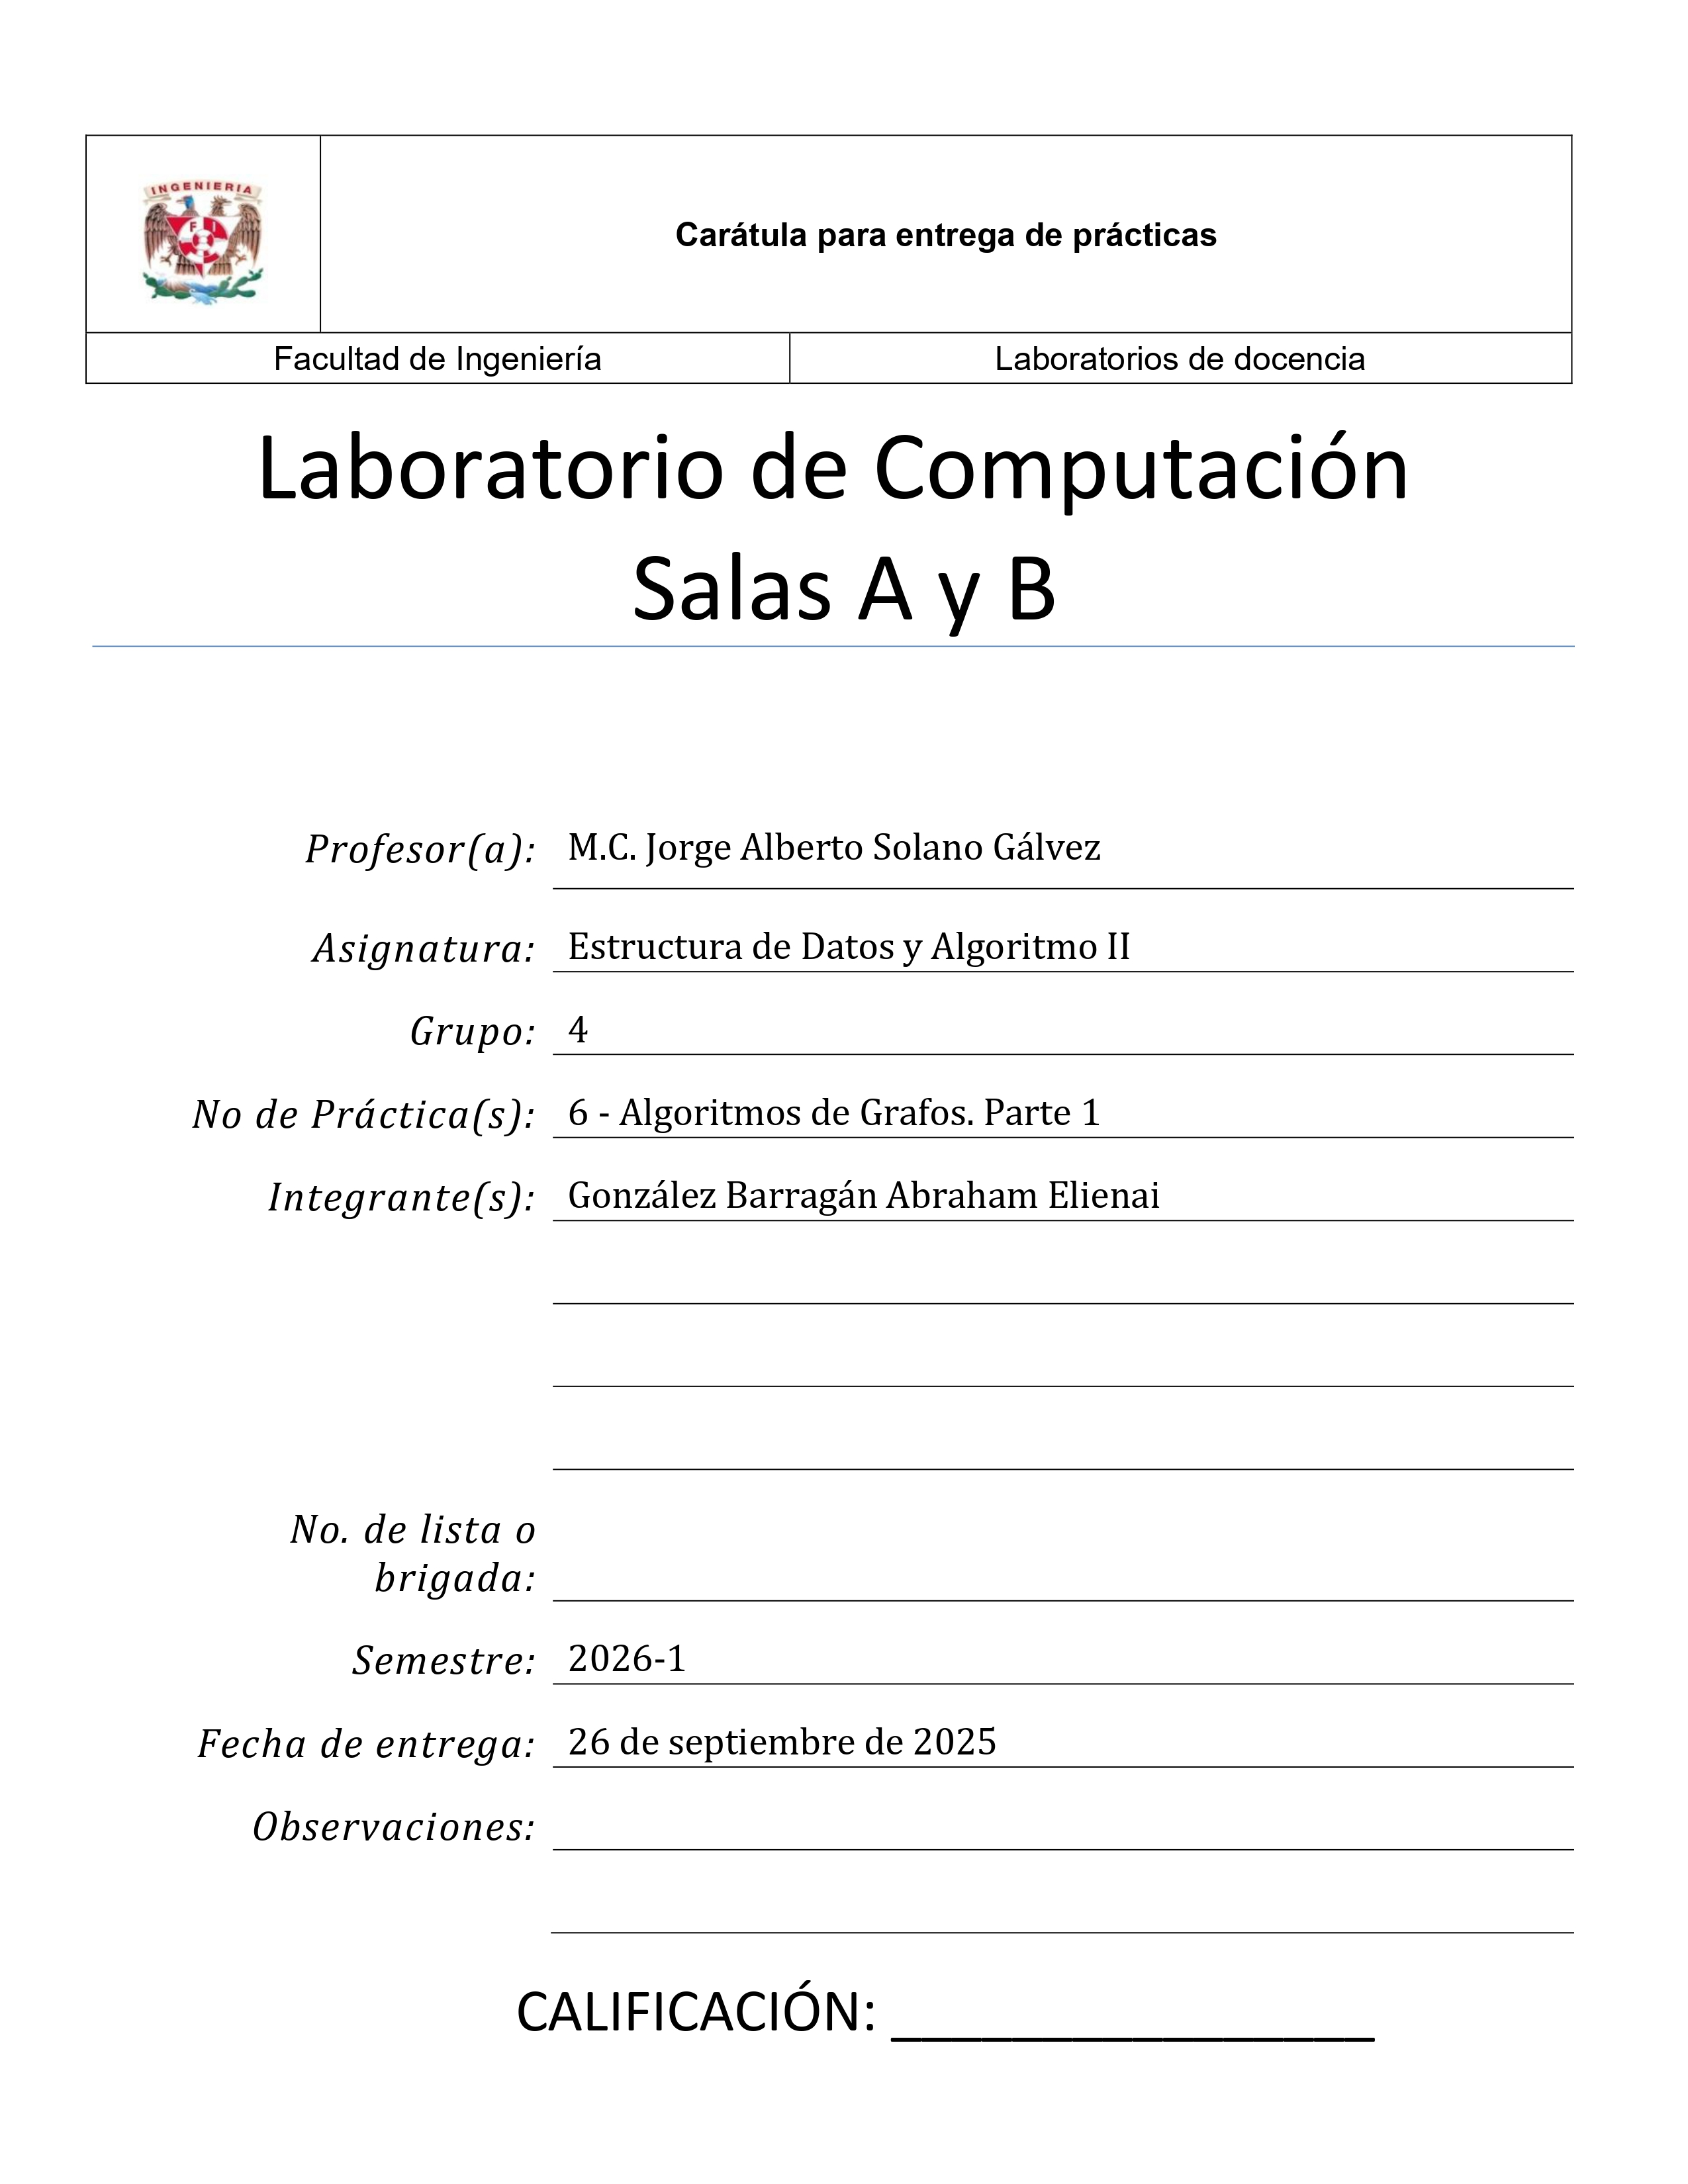

In [10]:
from IPython.display import Image, display

display(Image(filename='portada_p6.jpg', width=500, height=0))

# **Objetivo:**
Conocer las formas de representar un grafo e identificar las características necesarias para entender el algoritmo de **búsqueda por expansión**

# **Descripción de las actividades realizadas:**
- **Implementar** en lenguaje Python el algoritmo de **búsqueda por expansión** dentro de un grafo a partir de un nodo fuente **s**. El grafo puede ser dirigido y no dirigido, puede tener o no costo.
- Obtener el **polinomio y la complejidad** algorítmica del algoritmo **búsqueda por expansión** para el mejor, el peor y el caso promedio.
- Crear las **gráficas de la complejidad** que tiene el algoritmo de **búsqueda por expansión** dentro de un grafo para el mejor caso, el peor caso y el caso promedio.

# **Resultados obtenidos (Código y Graficas):**

In [ ]:
import random
import matplotlib.pyplot as plt

class Node:
    to = 0
    cost = 0
    nxt = None
    # BFS attributes
    prev = None
    color = 0
    distance = -1

In [ ]:
class Graph:
    def __init__(self, numNodes, numEdges, directed, cost): # ---- Constructor ----
        self.edges = []
        self.grade = []
        self.numNodes = numNodes
        self.numEdges = numEdges
        self.directed = True if directed == 1 else False
        self.hasCost = True if cost == 1 else False
        
        i = 0
        while i <= self.numNodes:
            self.grade.append(0)
            self.edges.append(None)
            i += 1
    
    def insert_edge(self, intU, intV, intCost, isDirected): # ---- Insertar Aristas ----
        item = Node()
        item.cost = intCost
        item.to = intV
        item.nxt = self.edges [intU]

        self.edges [intU] = item
        self.grade [intU] += 1

        if isDirected == False and intV != intU:
            self.insert_edge(intV, intU, intCost, True)

    def read_edges (self): # ---- Colocar Aristas ----
        i = 1
        while i <= self.numEdges:
            u = int (input ('u: ') )
            v = int (input ('v: '))

            if self.hasCost == True:
                cost = input ('Cost / weight: ')
            else:
                cost = 1

            self.insert_edge(u, v, cost, self.directed)
            i += 1
    
    def print(self): # ---- Ver Grafo ----
        if self.numNodes == 0:
            print("El grafo está vacío.")
            return
            
        string = ""
        for i in range(1, self.numNodes + 1):
            string += "[" + str(i) + "] -> "
            item = self.edges[i]
            if item is None:
                string += " (sin conexiones)"
            while item is not None:
                string += "[" + str(item.to) + "] "
                item = item.nxt
            string += "\n"
        print(string)
    
    def binary_tree(self):
        if self.numNodes < 2: return
        edges_added = 0
        for i in range(2, self.numNodes + 1):
            if edges_added >= self.numEdges: break
            parent = i // 2
            self.insert_edge(parent, i, 1, self.directed)
            edges_added += 1

    def star(self):
        if self.numNodes < 2: return
        edges_added = 0
        centro = 1
        for i in range(2, self.numNodes + 1):
            if edges_added >= self.numEdges: break
            self.insert_edge(centro, i, 1, self.directed)
            edges_added += 1

    def complete(self):
        if self.numNodes < 2: return
        edges_added = 0
        for i in range(1, self.numNodes + 1):
            for j in range(i + 1, self.numNodes + 1):
                if edges_added >= self.numEdges: return
                self.insert_edge(i, j, 1, self.directed)
                edges_added += 1

    def random(self):
        if self.numNodes < 2: return
        edges_added = 0
        for i in range(1, self.numNodes + 1):
            for j in range(i + 1, self.numNodes + 1):
                if edges_added >= self.numEdges: return
                if random.randint(0, 1):
                    self.insert_edge(i, j, 1, self.directed)
                    edges_added += 1
    
            
    def breadth_first_search(self, intSource):                                      # Temporal          # Espacial
        time = 0
        space = 0
        if self.edges[intSource] is None: return 1, 1                               # 8                 # 1         <--- En caso de que el grafo tenga nodos aislados
        self.edges[intSource].color = 1                                             # 6                 # 2
        self.edges[intSource].distance = 0                                          # 6                 # 2
        self.edges[intSource].prev = None                                           # 6                 # 2
        queue = []                                                                  # 3                 # 2
        queue.append(intSource)                                                     # 3                 # 1
        space += 1
        while len(queue) != 0:                                                      # 4                 # 1
            time += 1
            u = queue.pop(0)                                                        # 5                 # 2
            v = self.edges[u]                                                       # 4                 # 2
            while v != None:                                                        # 4n                # 1n
                time += 1
                if self.edges[v.to] != None:                                        # 7n                # 1n
                    if self.edges[v.to].color == 0:                                 # 8n                # 2n
                        self.edges[v.to].color = 1                                  # 8n                # 2n
                        self.edges[v.to].distance = self.edges[u].distance + 1      # 12n               # 2n
                        self.edges[v.to].prev = u                                   # 7n                # 2n
                        queue.append(v.to)                                          # 4n                # 1n
                        space += 1
                v = v.nxt                                                           # 4                 # 2
            self.edges[u].color = 2                                                 # 6                 # 2
        return time, space                                  # Mejor Caso:           = 8                 = 1 <--- Con un grafo de nodos aislados. 
                                                            # Peor Caso:            = 50n^2+55          = 11n+17 <--- Con un grafo completo. 
                                                            # Caso Prom:            = 25n^2+27          = 5n+9 <--- Con un grafo aleatorio. Basado en un grafo completo pero aleatoriamente decidiendo si formará o no algunos enlaces. 
                                                            #                                           Justificación en el reporte.
    def print_bfs_tree(self, intSource):
        children = {i: [] for i in range(1, self.numNodes + 1)}
        for i in range(1, self.numNodes + 1):
            parent = self.edges[i].prev
            if parent != None:
                children[parent].append(i)
        def print_recursive(node_index, prefix=""):
            node_children = children.get(node_index, [])
            for i, child_index in enumerate(node_children):
                is_last = (i == len(node_children) - 1)
                connector = "└── " if is_last else "├── "
                print(prefix + connector + str(child_index))
                new_prefix = prefix + ("    " if is_last else "│   ")
                print_recursive(child_index, new_prefix)
        print(intSource)
        print_recursive(intSource)

## **Prueba**

In [ ]:
g = Graph(7, 6, 0, 0)
g.binary_tree()
g.print()
g.breadth_first_search(1)
g.print_bfs_tree(1)
#          1
#        /  \
#       /    \
#      2      3
#    / \     / \
#   /   \   /   \
#  4    5  6     7

[1] -> [3] [2] 
[2] -> [5] [4] [1] 
[3] -> [7] [6] [1] 
[4] -> [2] 
[5] -> [2] 
[6] -> [3] 
[7] -> [3] 

1
├── 2
│   ├── 4
│   └── 5
└── 3
    ├── 6
    └── 7


## **Mejor Caso $O(1)$**

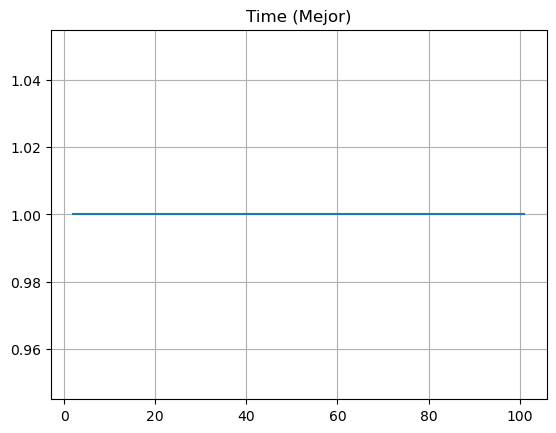

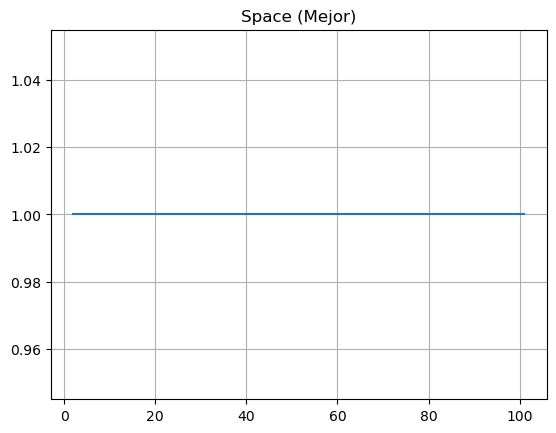

In [ ]:
MAX = 100

x = []
y_time = []
y_space = []

for i in range(2, MAX + 2):
    g = Graph(i, 0, 0, 0)
    time, space = g.breadth_first_search(1)
    x.append(i)
    y_time.append(time)
    y_space.append(space)

plt.title("Time (Mejor)")
plt.plot(x, y_time)
plt.grid(1)
plt.show()

plt.title("Space (Mejor)")
plt.plot(x, y_space)
plt.grid(1)
plt.show()

y_mejor = y_time, y_space

## **Peor Caso $O(V^2)$**

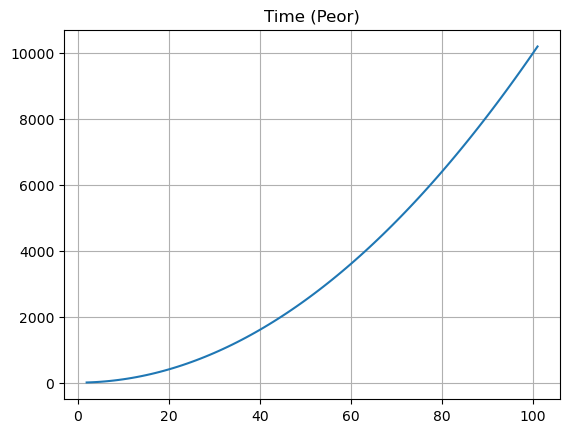

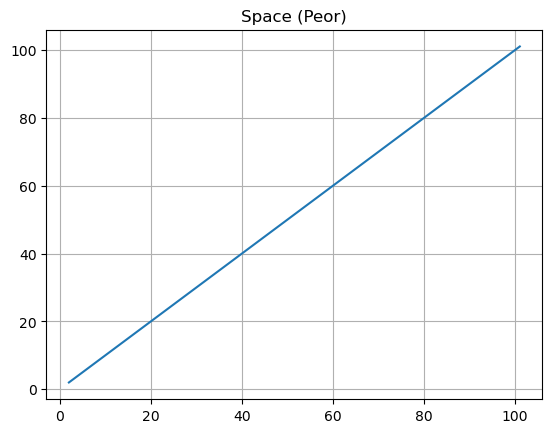

In [ ]:
MAX = 100

x = []
y_time = []
y_space = []

for i in range(2, MAX + 2):
    g = Graph(i, (i*(i-1)) // 2, 0, 0)
    g.complete()
    time, space = g.breadth_first_search(1)
    x.append(i)
    y_time.append(time)
    y_space.append(space)

plt.title("Time (Peor)")
plt.plot(x, y_time)
plt.grid(1)
plt.show()

plt.title("Space (Peor)")
plt.plot(x, y_space)
plt.grid(1)
plt.show()

y_peor = y_time, y_space

## **Caso Promedio $O(V^2)$**

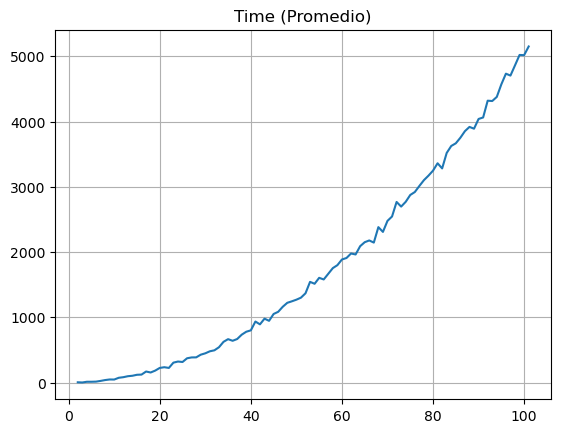

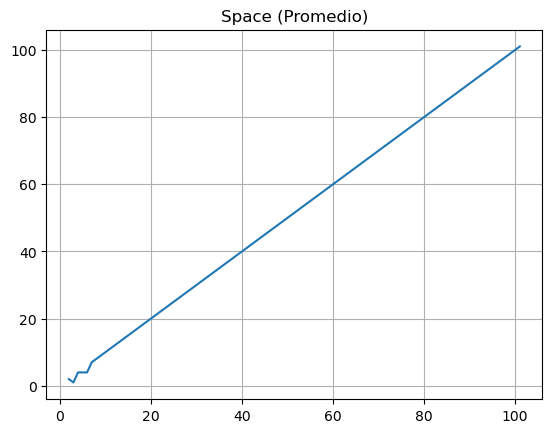

In [ ]:
MAX = 100

x = []
y_time = []
y_space = []

for i in range(2, MAX + 2):
    g = Graph(i, (i*(i-1)) // 2, 0, 0)
    g.random()
    time, space = g.breadth_first_search(1)
    x.append(i)
    y_time.append(time)
    y_space.append(space)
plt.title("Time (Promedio)")
plt.plot(x, y_time)
plt.grid(1)
plt.show()

plt.title("Space (Promedio)")
plt.plot(x, y_space)
plt.grid(1)
plt.show()

y_promedio = y_time, y_space

## **Comparativa**

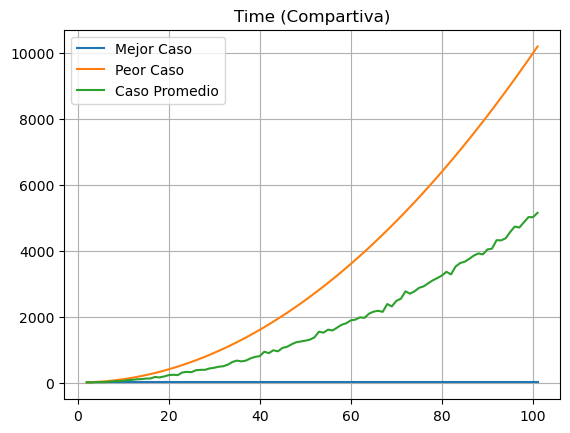

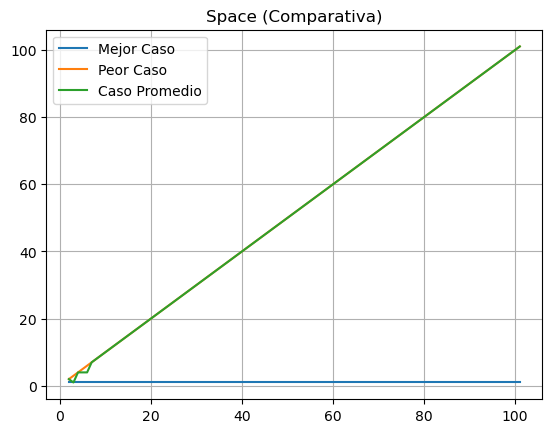

In [ ]:
plt.title("Time (Compartiva)")
plt.plot(x, y_mejor[0], label="Mejor Caso")
plt.plot(x, y_peor[0], label="Peor Caso")
plt.plot(x, y_promedio[0], label="Caso Promedio")
plt.legend()
plt.grid(1)
plt.show()

plt.title("Space (Comparativa)")
plt.plot(x, y_mejor[1], label="Mejor Caso")
plt.plot(x, y_peor[1], label="Peor Caso")
plt.plot(x, y_promedio[1], label="Caso Promedio")
plt.legend()
plt.grid(1)
plt.show()

# **Conclusiones**

En esta práctica se analizó empírica y gráficamente la complejidad temporal y espacial del algoritmo de Búsqueda en Amplitud (BFS). A través de la implementación de una clase Graph y la generación de distintos tipos de grafos, se pudo verificar cómo la estructura del grafo impacta directamente en el rendimiento del algoritmo, validando los resultados teóricos esperados.

1. **Determinación de los casos:**

    La complejidad de este algoritmo esta dada de la siguiente forma $O(V+A)$ donde $V=n_{vertices/nodos}$ y $A=n_{aristas/enlaces}$.

    Aristas y vertices son los elementos de los que depende la complejidad, y despues de pensar, investigar y hacer pruebas llegue a que podía considerar un grafo que no tuviera aristas, solo vertices, un grafo de nodos aislados, ***Reinhard Diestel*** en su libro *"Graph Theory"*  define "empty graph" como el grafo $G=(V,A)$ donde $A=0$, otros autores lo llaman grafo nulo, vacío o independiente.

    - Mejor Caso:
        - Dado que este "empty graph" no tiene aristas la complejidad de búsqueda para este algoritmo podría ser $O(V)$, sin embargo al estar los nodos aislados el algoritmo no recorrería ningún nodo pues el algoritmo siempre toma como nodo fuente a un cierto nodo y no considera cambiar de nodo fuente por lo que la complejidad de quedaría como $O(1)$ tanto temporal como espacialmente porque la cola que que guarda los nodos encontrados nunca guardaría un nodo ya que al no tener un sucesor la función bfs solo retoraría time y space como 1. Y este sería el mejor caso $(O(1))$.

    - Peor Caso:
        - Partiendo de la definición del la complejidad del grafo y despues de pensar, hacer pruebas e investigar llegue a que utilizando grafo completo en el cual todos los vertices están conectados entre sí puede denotarse $G=(V,A)$ donde $A=V(V-1)/2$
        desarrollando esta expresión queda $(V^2-V)/2$ entonces la complejidad temporal sería $O(V+V^2)$ o tomando solo el término con el mayor grado de exponente $O(V^2)$, y aunque el algoritmo no tiene ciclos anidados la cantidad de aristas es lo que causa la complejidad cuadrática, al igual que counting y radix sort sin necesidad de que haya ciclos la complejidad temporal se puede volver cuadrática por el tamaño de la entrada en este caso por el número de aristas. Y este sería el peor caso $(O(V^2))$.

    - Caso Promedio:
        - Generalmente este caso siempre lo genero de forma aleatoria pero en esta práctica de grafos lo aleatorio debía definirlo en donde pues debía definir un grafo ni completamente lleno de aristas (como el peor caso) ni completamente aislado (como el mejor caso), debía ser un grafo donde las aristas pueden existir con una cierta probabilidad y si este se parece  mínimamente a ambos casos su complejidad también sería $O(V^2)$ ya que aunque es un grafo aleatorio existe la mínima posibilidad de que se creen todas las aristas y se llegue a convertir en el peor caso y aunque la probabilidad es de $0.5^{V(V-1)/2}$, infinitamente pequeña pero aun así $P>0$. Este es el caso promedio $O(V^2)$.

        Para estos últimos por definición la complejidad espacial es es $O(V)$ dado que el único espacio que se utiliza es el de la queue para guardar los nodos encontrados que son igual al número de nodos o vertices.

2. **Construcción de Grafos Usados**

    - Grafo Aislado: Simplemente se crea una instancia $Graph(n, 0, 0, 0)$ sin llamar a ninguna función para añadir aristas, el resultado es un conjunto de n nodos sin aristas.
    - Grafo Completo (complete): Se utilizan dos bucles anidados para recorrer todos los pares de nodos $(i, j)$ donde $i < j$, pues esto garantiza que cada nodo esté conectado con todos los demás exactamente una vez.
    - Grafo Aleatorio (random): La lógica es similar a la del grafo completo, pero la creación de cada arista está sujeta a una condición *if random.randint(0, 1)*, esto le da a cada posible arista un 50% de probabilidad de ser creada.

3. **Función *read_edges***

    La función **read_edges** está diseñada para que un usuario introduzca las aristas de un grafo de forma manual e interactiva, para esta práctica de análisis de complejidad, este método no es tan requerido por dos razones:
        - Automatización: Ya que se necesita generar y analizar grafos de hasta 200 o + nodos e introducir manualmente las miles de aristas de un grafo completo sería impráctico y propenso a errores.
        - Control: Para analizar casos específicos (mejor, peor, promedio), se requiere un control preciso sobre la estructura del grafo, las funciones complete(), random() y la simple inicialización sin aristas permiten crear estas estructuras de forma programática y reproducible, algo que la entrada manual no garantiza.

4. **Para los nodos aislado**

    Es indispensable el caso del grafo vacío por lo cual es fundamental saber como tratarlo en código. En la implementación, ***self.edges[intSource]*** es la cabeza de la lista de adyacencia del nodo fuente pero si el nodo es aislado, esta lista está vacía y ***self.edges[intSource]*** es ***None***, sin esta comprobación, esta línea ***(self.edges[intSource].color = 1)*** intentaría acceder a un atributo de ***None***, provocando un ***AttributeError*** y deteniendo el programa.
    
    *if self.edges[intSource] is None: return 1, 1*

    Esta línea es precisamente la que implementa la lógica del mejor caso, pues detecta inmediatamente que el nodo fuente no tiene vecinos y termina la ejecución, asegurando la complejidad constante $O(1)$.

5. **Aprendizaje**

    Esta práctica me dejo mucho aprendizaje sobre todo en cuanto a los tipos de grafos que existen pues al observarlos y entenderlos de manera abstracta pude comprender como es que en la vida cotidiana están implícitos por todos lados, en el internet, en el procesamiento de información inclusive en como tomamos decisiones.

    Tambien aprendí que la eficiencia de un algoritmo no es un valor absoluto, sino que depende fundamentalmente de la estructura de los datos de entrada. Y entre otras cosas como la topología del grafo es determinante: Un grafo disperso (nodos aislados) permite que el algoritmo se ejecute en tiempo constante (mejor caso), mientras que un grafo denso (completo) lo fuerza a su límite cuadrático (peor caso), esto me enseña la importancia de conocer las características de los datos con los que se trabajará.

    Graficar el rendimiento no es solo un ejercicio visual, sino una herramienta para validar el conocimiento teórico, la forma de las curvas (constante, lineal, cuadrática) confirma de manera tangible lo que la notación Big O predice de forma abstracta. El análisis no solo se limita al tiempo, sino también al espacio, aprendí que ambos recursos son importantes y que su complejidad puede crecer a ritmos diferentes (en este caso, tiempo $O(V^2)$ vs. espacio $O(V)$ en el peor caso).